In [1]:
#load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)


In [2]:
#load Dataset
loan_df=pd.read_csv("loan.csv")
loan_df.head()

C:\Users\akashsikroria\AppData\Local\Temp\ipykernel_17384\84921088.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
#dataframe information
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#checking empty columns in %age
round((100*loan_df.isnull().sum())/len(loan_df.index))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [5]:
#drop all the columns which contains 100% Nan Data
loan_df.dropna(axis=1,how='all',inplace=True)
round((100*loan_df.isnull().sum())/len(loan_df.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [6]:
#drop columns in which nan data is very high in percentage
loan_df.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [7]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
#check rows which contains 100% empty data
round((100*loan_df.isnull().sum(axis=1))/len(loan_df.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [9]:
#check the unique target values
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [10]:
#drop Current loan status from the rows
loan_status_list = ['Fully Paid','Charged Off']
loan_df=loan_df[loan_df['loan_status'].isin(loan_status_list)]
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
#Extract necessary columns which might impact the target columns i.e. Feature selection
loan_df=loan_df.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','issue_d','loan_status','purpose',
             'addr_state','dti')]
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,CA,20.00
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,Fully Paid,wedding,AZ,11.20


In [12]:
#create new column from the existing column
loan_df['year'] = loan_df['issue_d'].apply(lambda x:x.split('-')[1])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,AZ,27.65,11
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00,11
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,IL,8.72,11
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,CA,20.00,11
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,Fully Paid,wedding,AZ,11.20,11


In [13]:
#convert the data type from string to int and check the type
loan_df['year'] = loan_df['year'].astype(int)
type(loan_df['year'][0])

numpy.int64

In [14]:
#find all the unique year for graph
unique_values = loan_df['year'].value_counts().index.to_numpy()

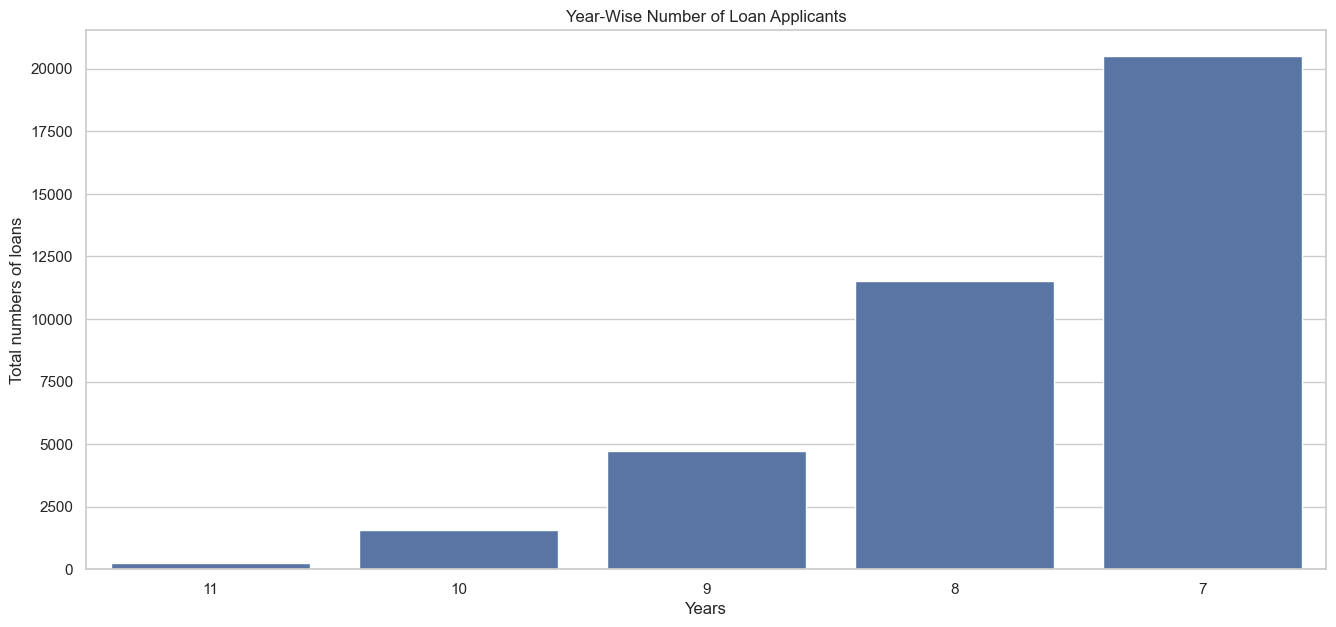

In [15]:
#draw a countplot to show the year wise increasing amount of loans in lending clubs 
plt.figure(figsize=(16,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='year',data=loan_df)
years = unique_values
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Total numbers of loans',title='Year-Wise Number of Loan Applicants')
plt.xticks(xpos,years)
plt.show()

In [16]:
#In this univariate analysis , Substantial growth between 2007-2011 in the number of loan applicants

In [17]:
#Checking types for conversion
loan_df.dtypes

loan_amnt           int64
term               object
int_rate           object
grade              object
emp_length         object
home_ownership     object
annual_inc        float64
issue_d            object
loan_status        object
purpose            object
addr_state         object
dti               float64
year                int64
dtype: object

In [18]:
#Convert int_rate to int
loan_df['int_rate']=loan_df['int_rate'].str.replace('%','')
loan_df['int_rate']=loan_df['int_rate'].astype(float)
type(loan_df['int_rate'][0])

numpy.float64

In [19]:
#create new column from the existing column


In [20]:
loan_df['month']= loan_df['issue_d'].apply(lambda x:x.split('-')[0])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,Fully Paid,wedding,AZ,11.20,11,Dec


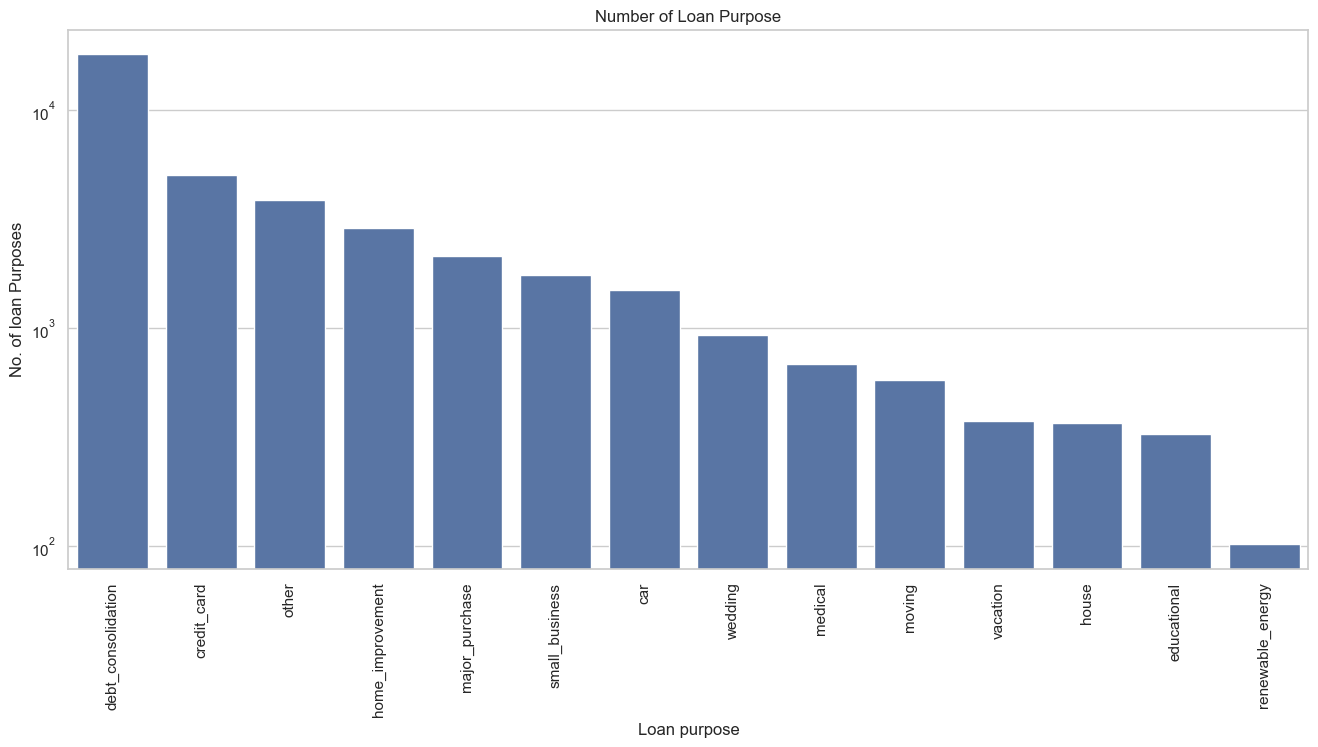

In [21]:
#Count plot to show the different loan purpose from the lending clubs
plt.figure(figsize=(16,7))
ax = sb.countplot(x='purpose',data=loan_df,order=loan_df['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of loan Purposes',title='Number of Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [22]:
#The five major purposes of Loan applications are - ‘debt_consolidation’ , ‘credit_card’ , ‘other’ , ‘home_improvement’ & ‘major_purchase’ debt_consolidation’ is the highest loan purpose

<Figure size 1600x700 with 0 Axes>

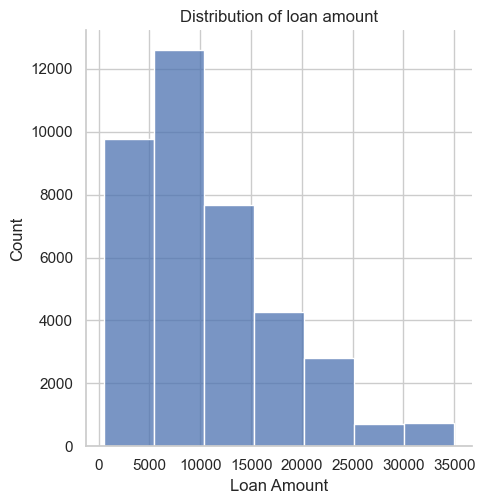

In [23]:
#loan amount distribution 
plt.figure(figsize=(16,7))
ax=sb.displot(loan_df['loan_amnt'],bins=7)
ax.set(xlabel='Loan Amount',title='Distribution of loan amount')
plt.show()

In [24]:
#The distribution of loan amount .It has been observed that the maximum loan range amount is between 5000-10000

In [25]:
#create a separate dataframe of defaulters
defaulters_df=loan_df.loc[loan_df['loan_status']=='Charged Off']
defaulters_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00,11,Dec
8,5600,60 months,21.28,F,4 years,OWN,40000.0,Dec-11,Charged Off,small_business,CA,5.55,11,Dec
9,5375,60 months,12.69,B,< 1 year,RENT,15000.0,Dec-11,Charged Off,other,TX,18.08,11,Dec
12,9000,36 months,13.49,C,< 1 year,RENT,30000.0,Dec-11,Charged Off,debt_consolidation,VA,10.08,11,Dec
14,10000,36 months,10.65,B,3 years,RENT,100000.0,Dec-11,Charged Off,other,CA,7.06,11,Dec


In [26]:
#calculate the percentage of loan defaulters according to grade
grade_df=pd.DataFrame(data=round((100*defaulters_df['grade'].value_counts())/loan_df['grade'].value_counts(),2))
unique_grades = loan_df['grade'].value_counts().index.to_numpy()
grade_df = pd.DataFrame(grade_df, unique_grades)
grade_df

,count
B,12.21
A,5.99
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


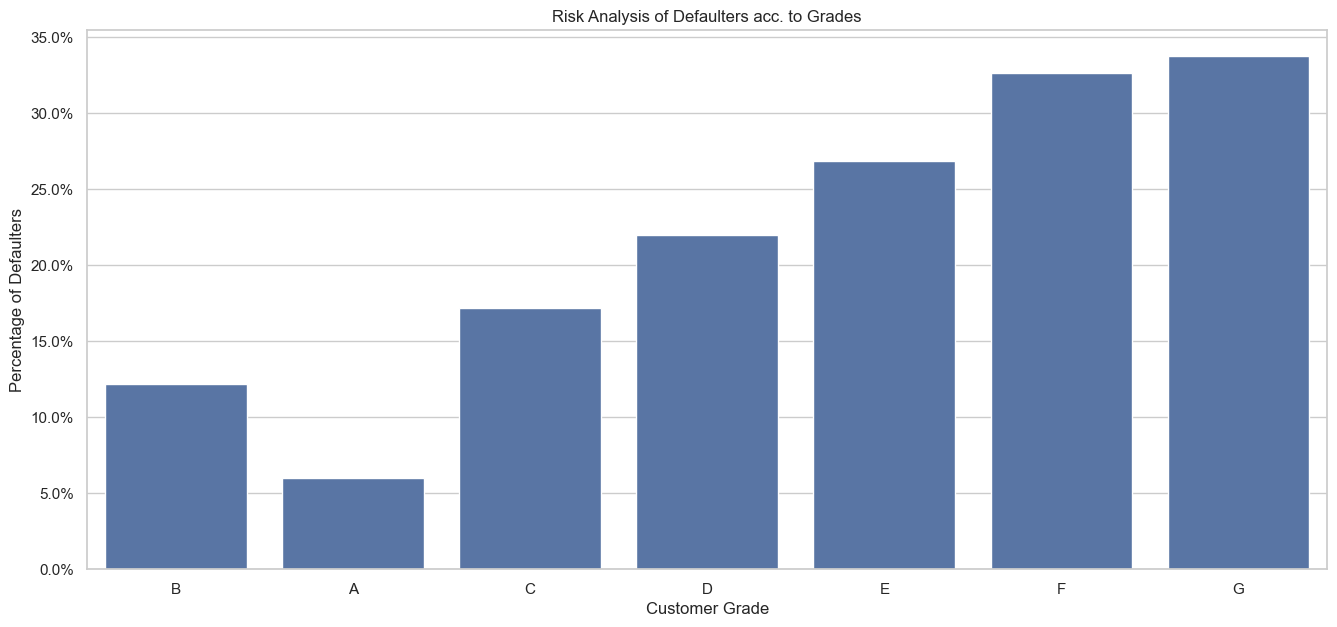

In [27]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=grade_df.index,y='count',data=grade_df)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [28]:
#calculate the percentage of loan defaulters according to loan purpose
purpose_df=pd.DataFrame(data=round((100*defaulters_df['purpose'].value_counts())/loan_df['purpose'].value_counts(),2))
unique_grades = loan_df['purpose'].value_counts().index.to_numpy()
purpose_df = pd.DataFrame(purpose_df, unique_grades)
purpose_df.sort_values(by='count',ascending=False,inplace=True)
purpose_df

,count
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13
home_improvement,12.07


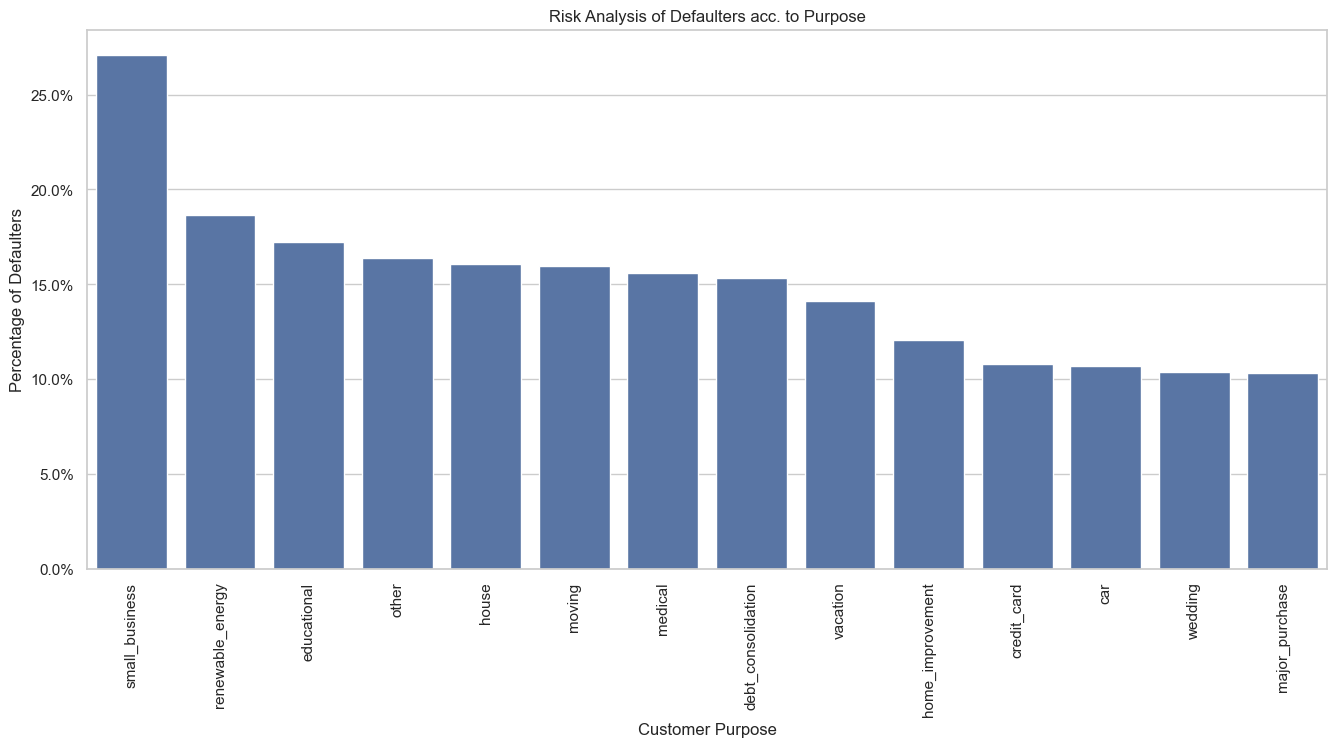

In [29]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=purpose_df.index,y='count',data=purpose_df)
ax.set(xlabel='Customer Purpose', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Purpose')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

In [30]:
#The percentage of risk of Defaulters is the largest in the Loan Purpose – ‘small_business’ , followed by ‘renewable_energy’ , ‘educational’

In [31]:
#calculate the percentage of loan defaulters according to Employee experience
emp_df=pd.DataFrame(data=round((100*defaulters_df['emp_length'].value_counts())/loan_df['emp_length'].value_counts(),2))
unique_emp = loan_df['emp_length'].value_counts().index.to_numpy()
emp_df = pd.DataFrame(emp_df, unique_emp)
emp_df.sort_values(by='count',ascending=False,inplace=True)
emp_df

,count
10+ years,15.68
7 years,15.37
1 year,14.39
5 years,14.34
< 1 year,14.17
6 years,14.16
8 years,14.15
3 years,13.83
4 years,13.82
2 years,13.21


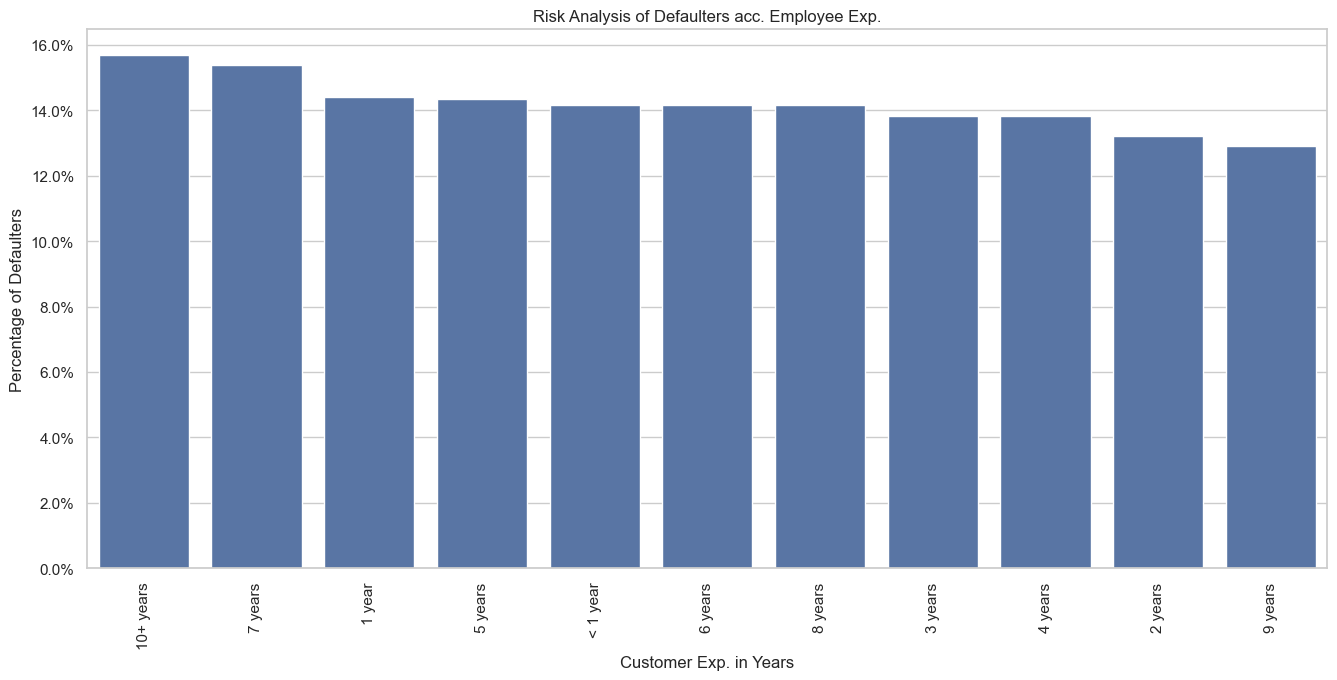

In [32]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=emp_df.index,y='count',data=emp_df)
ax.set(xlabel='Customer Exp. in Years', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee Exp.')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

In [33]:
#The percentage of risk of Defaulters is maximum for customer experience - 10+ years & minimum for 9 year’s experience . 

In [34]:
#calculate the percentage of loan defaulters according to home onwership
home_df=pd.DataFrame(data=round((100*defaulters_df['home_ownership'].value_counts())/loan_df['home_ownership'].value_counts(),2))
unique_ownership = loan_df['home_ownership'].value_counts().index.to_numpy()
home_df = pd.DataFrame(home_df, unique_ownership)
home_df.sort_values(by='count',ascending=False,inplace=True)
home_df.dropna(inplace=True)
home_df

,count
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67


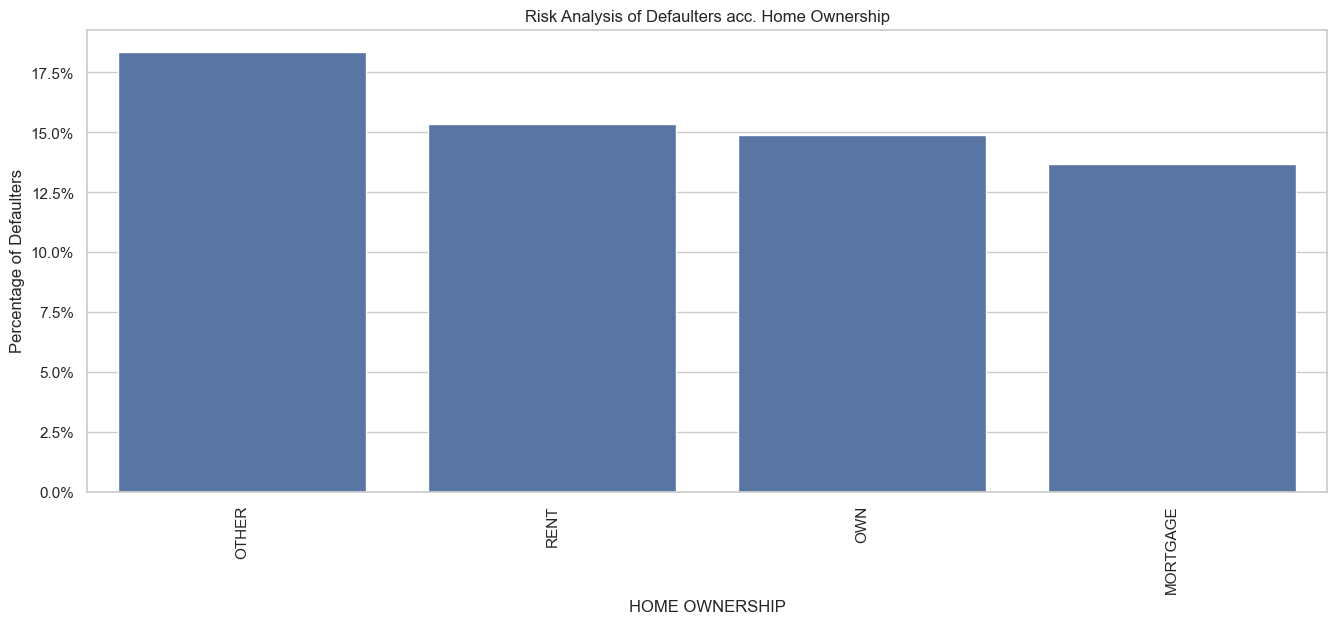

In [35]:
plt.figure(figsize=(16,6))
ax=sb.barplot(x=home_df.index,y='count',data=home_df)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

In [36]:
#The percentage of defaulter under home ownership is “Other” followed by “Rent” and “Own” and “Mortgage”

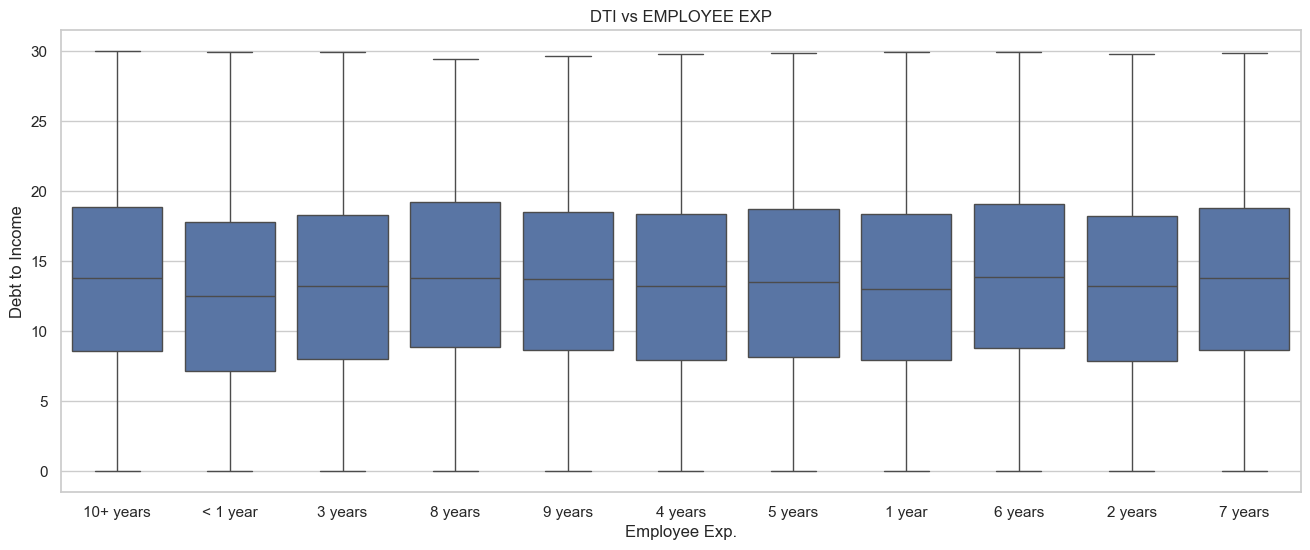

In [37]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='dti',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

In [38]:
#By doing bivariate analysis it has been observed that 10+ years of employee exp. Is having debt to income in maximum range apart from that rest year of employee exp. are more or less in same range.

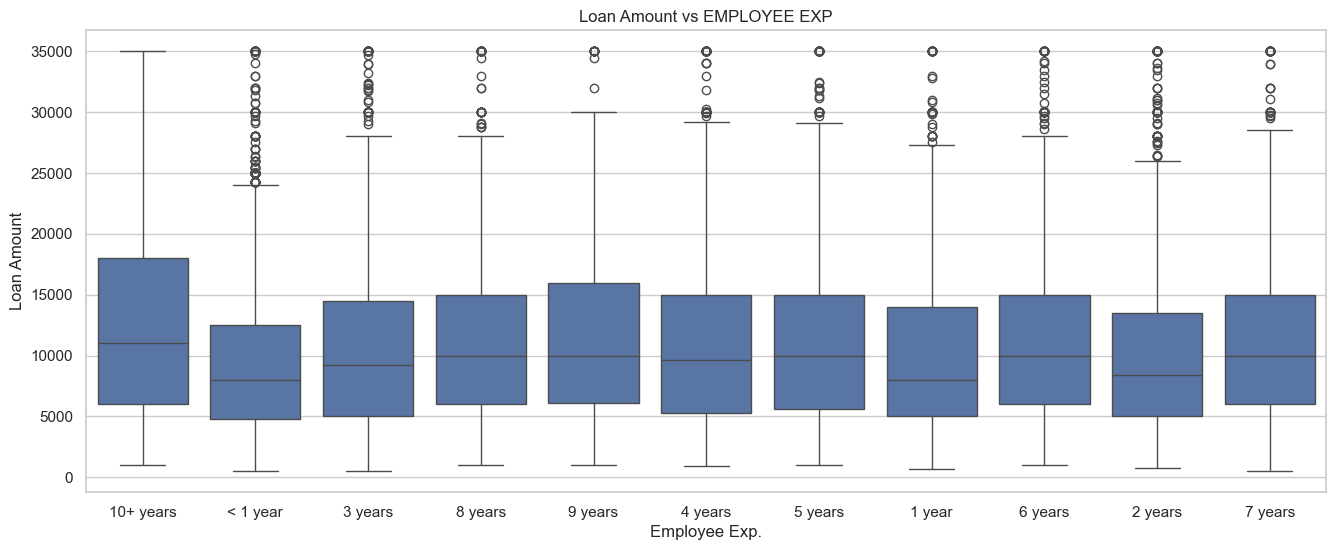

In [39]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='loan_amnt',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXP')
plt.show()

In [40]:
#By doing bivariate analysis it has been observed that the employee exp. With 10+ years is taking more amount of loan and those who are less than 1 year is taken less amount of loan.

In [41]:
#calculate the percentage of loan defaulters according to address of a state
state_df=pd.DataFrame(data=round((100*defaulters_df['addr_state'].value_counts())/loan_df['addr_state'].value_counts(),2))
unique_state = loan_df['addr_state'].value_counts().index.to_numpy()
state_df = pd.DataFrame(state_df, unique_state)
state_df.sort_values(by='count',ascending=False,inplace=True)
state_df=state_df.head(10)
state_df

,count
NE,60.00
NV,22.55
SD,19.35
AK,19.23
FL,18.12
MO,17.01
HI,16.87
ID,16.67
NM,16.39
OR,16.32


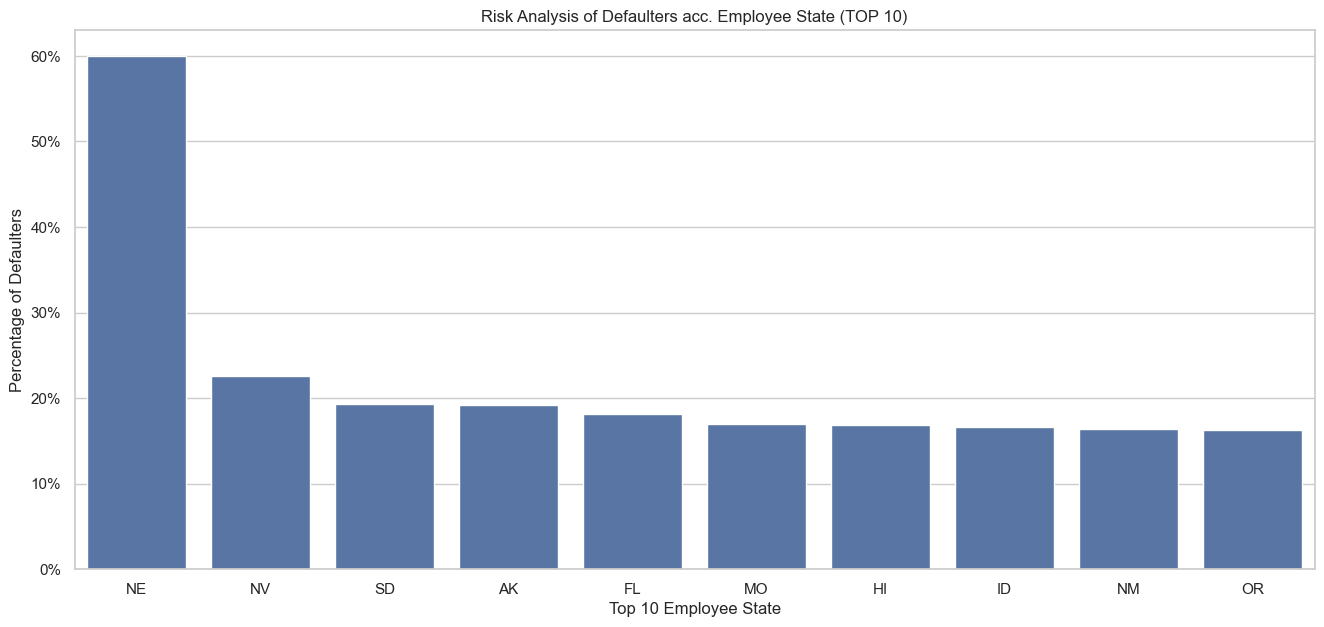

In [42]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=state_df.index,y='count',data=state_df)
ax.set(xlabel='Top 10 Employee State', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee State (TOP 10)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [43]:
#The percentage of Defaulters is maximum from NE (address) which is 60%

In [44]:
#calculate the percentage of loan defaulters according to term
term_df=pd.DataFrame(data=round((100*defaulters_df['term'].value_counts())/loan_df['term'].value_counts(),2))
unique_term = loan_df['term'].value_counts().index.to_numpy()
term_df = pd.DataFrame(term_df, unique_term)
term_df.sort_values(by='count',ascending=False,inplace=True)
term_df

,count
60 months,25.31
36 months,11.09


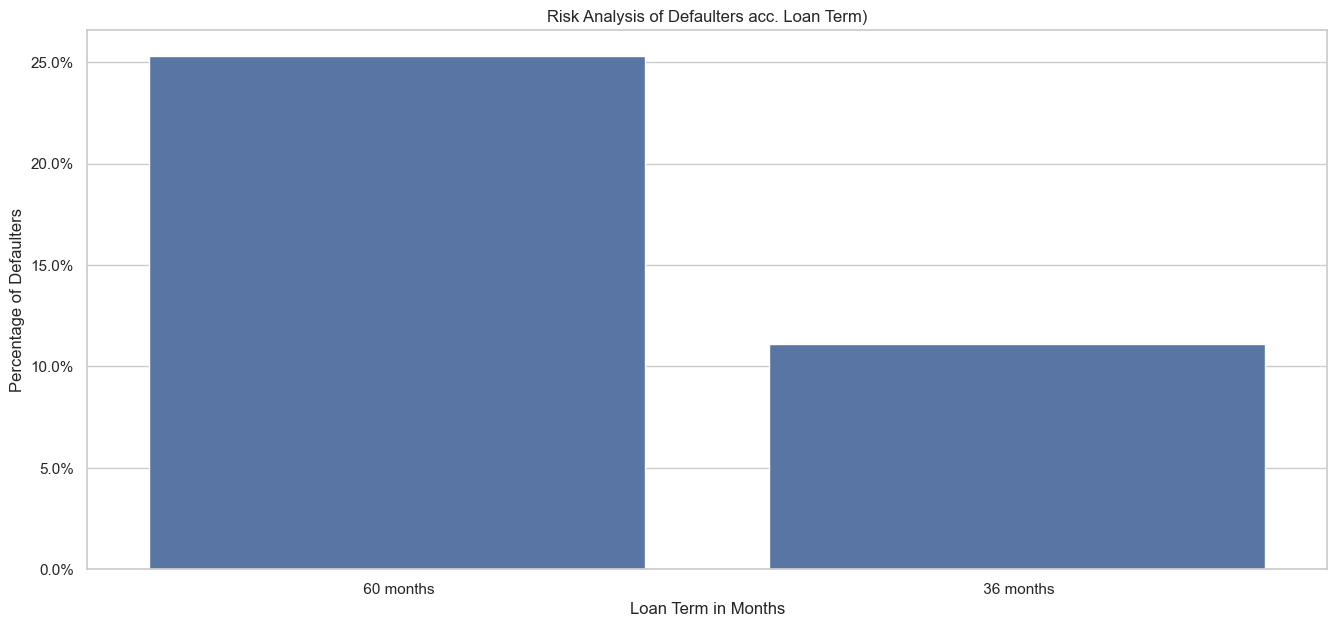

In [45]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=term_df.index,y='count',data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Loan Term)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [46]:
#The percentage of Defaulters is found in 60 months as compared to 36 months – Loan Term